In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

# Suppress warnings for clarity
warnings.filterwarnings("ignore")

In [68]:
# Import the chrome data
chrome_df = pd.read_csv("../CB_chrome_cleaned.csv")
chrome_df = chrome_df.drop(columns=["Unnamed: 0"])
chrome_df = chrome_df.rename(columns={"url": "url_chrome", "title": "title_chrome","visit_time": "time", "visit_date": "date"})

chrome_df["date"] = pd.to_datetime(chrome_df["date"])
start_date = "2025-01-01"
end_date = "2025-02-17"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
chrome_df = chrome_df[(chrome_df["date"] >= start_date) & (chrome_df["date"] <= end_date)]
chrome_df = chrome_df.sort_values("date")

chrome_df.head()

,url_chrome,visit_count,typed_count,title_chrome,time,date
15250,https://www.google.com/search?q=dsw&rlz=1C1ONG...,2,0,dsw - Google Search,02:05:20,2025-01-01
15407,https://www.google.com/search?q=tysons&rlz=1C1...,2,0,tysons - Google Search,22:47:12,2025-01-01
15408,https://www.google.com/search?q=tysons&rlz=1C1...,2,0,tysons - Google Search,22:47:12,2025-01-01
15409,https://www.tysonscornercenter.com/,1,0,Tysons Corner Center | Home,22:47:13,2025-01-01
15410,https://www.tysonscornercenter.com/Dining,3,0,Tysons Corner Center | Dining and Refreshments,22:47:21,2025-01-01


In [69]:
# get the first and last visited websites per date

def get_first_and_last_visits(df):
    # find first and last visited websites per date
    first_visits = df.loc[df.groupby("date")["time"].idxmin()]
    last_visits = df.loc[df.groupby("date")["time"].idxmax()]

    # select relevant columns
    first_visits = first_visits[["date", "time", "url_chrome", "title_chrome"]].rename(columns={
        "time": "chrome_visit_time_first",
        "url_chrome": "chrome_url_first",
        "title_chrome": "chrome_title_first"
    })
    
    last_visits = last_visits[["date", "time", "url_chrome", "title_chrome"]].rename(columns={
        "time": "chrome_visit_time_last",
        "url_chrome": "chrome_url_last",
        "title_chrome": "chrome_title_last"
    })

    # merge both DataFrames on visit_date to get one row per date
    visit_summary = pd.merge(first_visits, last_visits, on="date")
    return visit_summary

visit_summary_df = get_first_and_last_visits(chrome_df)
visit_summary_df.tail()

,date,chrome_visit_time_first,chrome_url_first,chrome_title_first,chrome_visit_time_last,chrome_url_last,chrome_title_last
38,2025-02-10,03:23:32,https://docs.google.com/presentation/?usp=slid...,Google Slides,23:55:24,https://www.netflix.com/watch/81773841?trackId...,Netflix
39,2025-02-11,02:53:29,https://docs.google.com/spreadsheets/u/1/d/e/2...,CS4774 ML Schedule - Google Drive,23:49:30,https://chatgpt.com/c/67abe207-6820-800b-99fc-...,Logarithmic Expression Simplification
40,2025-02-12,01:36:19,https://www.google.com/search?q=gmail&rlz=1C1O...,gmail - Google Search,23:53:21,https://www.youtube.com/watch?v=6v_R180kIGs,HALF HORSE HALF MAN | OFFICIAL VIDEO - YouTube
41,2025-02-13,00:49:50,https://www.google.com/search?q=problems+you+c...,problems you can solve in prolog - Google Search,23:57:44,https://support.google.com/accounts/answer/302...,How to download your Google data - Google Acco...
42,2025-02-14,00:13:53,https://www.google.com/search?q=hrome%3A%2F%2F...,chrome://settings/syncSetup - Google Search,00:21:53,https://sqlitebrowser.org/dl/,Downloads - DB Browser for SQLite


In [70]:
# Import the youtube and sleep data
youtube_sleep_df = pd.read_csv("../youtube_sleep_CB.csv")
youtube_sleep_df = youtube_sleep_df.drop(columns=["Unnamed: 0", "time_first", "url_first", "title_first", "type_first", "time_last", "url_last", "title_last", "type_last", "date_time", "session_id", "session_duration"])
youtube_sleep_df["date"] = pd.to_datetime(youtube_sleep_df["date"])
youtube_sleep_df.head()


,date,total_sleep_hours,sleep_start,sleep_end,had_session,total_videos_watched
0,2025-01-07,8.816667,2025-01-07 00:51:00-05:00,2025-01-07 10:00:00-05:00,True,20
1,2025-01-09,6.200000,2025-01-09 00:47:51-05:00,2025-01-09 07:44:51-05:00,True,4
2,2025-01-22,7.025000,2025-01-22 01:54:51-05:00,2025-01-22 08:59:51-05:00,True,6
3,2025-02-06,6.883333,2025-02-06 03:05:30-05:00,2025-02-06 10:00:00-05:00,True,5
4,2025-02-08,7.216667,2025-02-08 02:51:47-05:00,2025-02-08 12:48:25-05:00,True,2


In [71]:
# df = pd.merge(youtube_sleep_df, visit_summary_df, on="date", how="right")
# df.head()

In [72]:
keywords = pd.read_csv("../CB_data/cheryl_uva_keywords_chrome.csv")
keywords = keywords.drop(columns=["Unnamed: 0"])
keywords = keywords.rename(columns={"visit_date": "date"})
keywords["date"] = pd.to_datetime(keywords["date"])
df = pd.merge(keywords, visit_summary_df, on="date",how="inner")
df.head()

,date,total_count,uva,canvas,eqk9vb,drive,last_time,chrome_visit_time_first,chrome_url_first,chrome_title_first,chrome_visit_time_last,chrome_url_last,chrome_title_last
0,2025-01-01,43,28,0,15,0,2025-02-23 22:56:56,02:05:20,https://www.google.com/search?q=dsw&rlz=1C1ONG...,dsw - Google Search,22:56:56,https://www.amazon.com/s/ref=nb_sb_noss_2?url=...,Amazon.com : daisque
1,2025-01-02,0,0,0,0,0,2025-02-23 02:52:13,01:46:11,https://www.when2meet.com/?28134141-GcoK8,Club Figure Skating Spring 2024 Off Ice - When...,02:52:13,https://www.amazon.com/s?crid=1WQFLCYQMS1FY&i=...,Amazon.com : rice mask
2,2025-01-03,1,1,0,0,0,2025-02-23 02:14:16,01:56:00,https://www.amazon.com/s?crid=2ZM9BIE3J8XA8&i=...,Amazon.com : canmake,02:14:16,https://www.popflexactive.com/collections/perf...,Perfect Plane Pants - Black – POPFLEX®
3,2025-01-04,0,0,0,0,0,2025-02-23 02:50:25,00:58:56,https://mandrillapp.com/track/click/30837889/b...,My Team Shop,02:50:25,https://bsnteamsports.com/shop/2rkrRzKBQS/myte...,My Team Shop
4,2025-01-05,37,21,0,10,6,2025-02-23 23:22:58,00:11:47,https://www.netflix.com/browse,Home - Netflix,23:22:58,https://discussions.apple.com/thread/254776692,does an air tag interfere with credit car… - A...


In [73]:
df['day_of_week'] = df['date'].dt.day_name()


In [74]:
sleep_filename = "../cheryl_sleep_data.csv"

sleep_df = pd.read_csv(sleep_filename)
sleep_df["Date"] = pd.to_datetime(sleep_df["Date"])
sleep_df = sleep_df.rename(columns={"Date": "date"})
sleep_df = sleep_df.drop(columns=["Unnamed: 0"])
sleep_df.tail()

df["date"] = pd.to_datetime(df["date"])
df = pd.merge(sleep_df, df, on="date", how="right")
df.head()

,date,total_sleep_hours,sleep_start,sleep_end,total_count,uva,canvas,eqk9vb,drive,last_time,chrome_visit_time_first,chrome_url_first,chrome_title_first,chrome_visit_time_last,chrome_url_last,chrome_title_last,day_of_week
0,2025-01-01,8.258333,2025-01-01 02:04:45-05:00,2025-01-01 10:30:15-05:00,43,28,0,15,0,2025-02-23 22:56:56,02:05:20,https://www.google.com/search?q=dsw&rlz=1C1ONG...,dsw - Google Search,22:56:56,https://www.amazon.com/s/ref=nb_sb_noss_2?url=...,Amazon.com : daisque,Wednesday
1,2025-01-02,11.283333,2025-01-02 01:25:02-05:00,2025-01-02 16:03:02-05:00,0,0,0,0,0,2025-02-23 02:52:13,01:46:11,https://www.when2meet.com/?28134141-GcoK8,Club Figure Skating Spring 2024 Off Ice - When...,02:52:13,https://www.amazon.com/s?crid=1WQFLCYQMS1FY&i=...,Amazon.com : rice mask,Thursday
2,2025-01-03,7.325000,2025-01-03 02:04:16-05:00,2025-01-03 09:45:16-05:00,1,1,0,0,0,2025-02-23 02:14:16,01:56:00,https://www.amazon.com/s?crid=2ZM9BIE3J8XA8&i=...,Amazon.com : canmake,02:14:16,https://www.popflexactive.com/collections/perf...,Perfect Plane Pants - Black – POPFLEX®,Friday
3,2025-01-04,7.983333,2025-01-04 02:30:17-05:00,2025-01-04 16:18:02-05:00,0,0,0,0,0,2025-02-23 02:50:25,00:58:56,https://mandrillapp.com/track/click/30837889/b...,My Team Shop,02:50:25,https://bsnteamsports.com/shop/2rkrRzKBQS/myte...,My Team Shop,Saturday
4,2025-01-05,5.775000,2025-01-05 02:20:19-05:00,2025-01-05 10:14:49-05:00,37,21,0,10,6,2025-02-23 23:22:58,00:11:47,https://www.netflix.com/browse,Home - Netflix,23:22:58,https://discussions.apple.com/thread/254776692,does an air tag interfere with credit car… - A...,Sunday


In [75]:
df.to_csv("cheryl_data.csv")

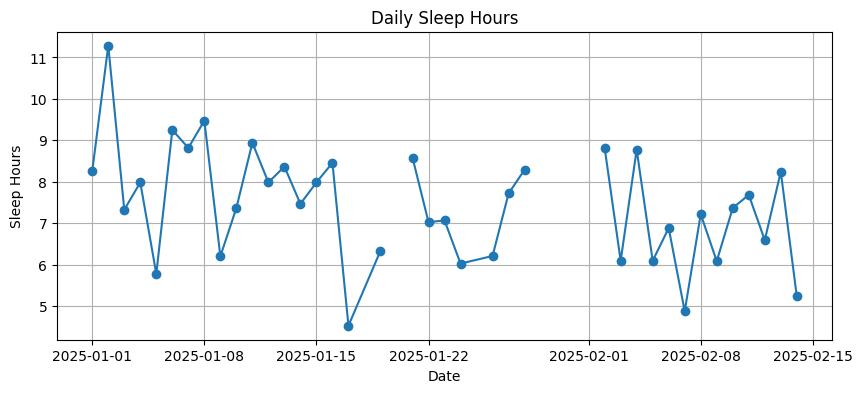

                               SARIMAX Results                                
Dep. Variable:      total_sleep_hours   No. Observations:                   43
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -66.533
Date:                Mon, 24 Feb 2025   AIC                            143.065
Time:                        14:41:33   BIC                            151.753
Sample:                    01-01-1970   HQIC                           146.250
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
total_count    -0.0014      0.004     -0.369      0.712      -0.009       0.006
uva             0.0086      0.007      1.150      0.250      -0.006       0.023
ar.L1          -0.8338      0.139     -6.010    

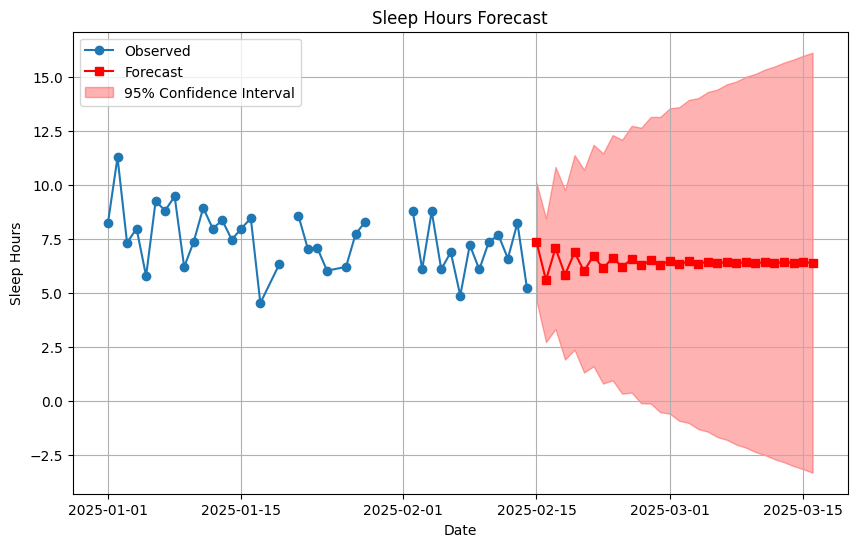

In [87]:
# Visualize the time series
plt.figure(figsize=(10, 4))
plt.plot(df.date, df['total_sleep_hours'], marker='o', linestyle='-')
plt.title('Daily Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.show()

# --- 2. Fit an ARIMA Model ---
# ARIMA models require stationary data. Here, we'll assume our simulated data is roughly stationary.
# You might need to perform tests (like ADF) and transformations in practice.
# We use an ARIMA(1,1,1) model as an example.
# Define your exogenous features. Replace 'other_feature' with the name(s) of your feature column(s).
exog_features = ['total_count', "uva"]


# Ensure that the exogenous features are numeric.
# Use SARIMAX (recommended for including exogenous regressors)
model = sm.tsa.SARIMAX(df['total_sleep_hours'],
                       order=(1, 1, 1),
                       exog=df[exog_features])

results = model.fit()

# Print a summary of the model fit
print(results.summary())

# --- 3. Forecast Future Sleep Hours ---
# Forecast the next 7 days
forecast_steps = 30
forecast_exog = pd.DataFrame({col: [df[col].iloc[-1]] * forecast_steps for col in exog_features})
forecast = results.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_df = forecast.summary_frame()

# Display the forecast results
print(forecast_df)

# --- 4. Plot the Observed Data and Forecast ---
plt.figure(figsize=(10, 6))
plt.plot(df.date, df['total_sleep_hours'], label='Observed', marker='o')
# Forecast index: create new dates starting from the last date in df_sleep
# Convert the index to datetime
df.date = pd.to_datetime(df.date)
forecast_index = pd.date_range(start=df.date[-1] + pd.DateOffset(days=1),
                               periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_df['mean'], label='Forecast', color='red', marker='s')
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='red', alpha=0.3, label='95% Confidence Interval')
plt.title('Sleep Hours Forecast')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()

Exogenous Data Types:
Monday         float64
Saturday       float64
Sunday         float64
Thursday       float64
Tuesday        float64
Wednesday      float64
total_count    float64
dtype: object
Exogenous Data Preview:
                               Monday  Saturday  Sunday  Thursday  Tuesday  \
1970-01-01 00:00:00.000000000     0.0       0.0     0.0       0.0      0.0   
1970-01-01 00:00:00.000000001     0.0       0.0     0.0       1.0      0.0   
1970-01-01 00:00:00.000000002     0.0       0.0     0.0       0.0      0.0   
1970-01-01 00:00:00.000000003     0.0       1.0     0.0       0.0      0.0   
1970-01-01 00:00:00.000000004     0.0       0.0     1.0       0.0      0.0   

                               Wednesday  total_count  
1970-01-01 00:00:00.000000000        1.0         43.0  
1970-01-01 00:00:00.000000001        0.0          0.0  
1970-01-01 00:00:00.000000002        0.0          1.0  
1970-01-01 00:00:00.000000003        0.0          0.0  
1970-01-01 00:00:00.000000004 

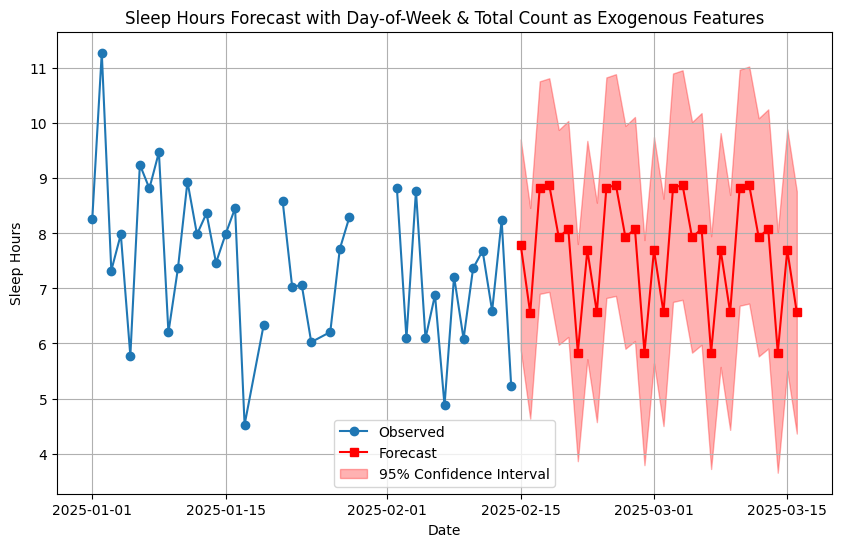

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # <-- Added import for plotting
import statsmodels.api as sm

# --- 1. Prepare Your Data ---
# Ensure df is defined. Example: df should have columns 'date', 'total_sleep_hours', and 'total_count'.
df['date'] = pd.to_datetime(df['date'])

# Convert target and total_count to numeric if necessary
df['total_sleep_hours'] = pd.to_numeric(df['total_sleep_hours'], errors='coerce')
df['total_count'] = pd.to_numeric(df['total_count'], errors='coerce')

# Create a day_of_week column and one-hot encode it.
df['day_of_week'] = df['date'].dt.day_name()
day_dummies = pd.get_dummies(df['day_of_week'], drop_first=True)

# Combine day-of-week dummies with the 'total_count' column to create exogenous features.
exog = pd.concat([day_dummies, df[['total_count']]], axis=1)

# Ensure exog is numeric
exog = exog.apply(pd.to_numeric, errors='coerce')
exog.fillna(0, inplace=True)
exog = exog.astype(np.float64)

# Check the exogenous DataFrame
print("Exogenous Data Types:")
print(exog.dtypes)
print("Exogenous Data Preview:")
print(exog.head())

# --- 2. Fit the SARIMAX Model ---
model = sm.tsa.SARIMAX(df['total_sleep_hours'], order=(1, 1, 1), exog=exog)
results = model.fit()
print(results.summary())

# --- 3. Forecast Future Sleep Hours with Exogenous Features ---
forecast_steps = 30

# Create a forecast index (future dates)
forecast_index = pd.date_range(start=df.date.iloc[-1] + pd.DateOffset(days=1),
                               periods=forecast_steps, freq='D')

# Create a forecast DataFrame for future dates
forecast_df = pd.DataFrame({'date': forecast_index})
forecast_df['day_of_week'] = forecast_df['date'].dt.day_name()
forecast_day_dummies = pd.get_dummies(forecast_df['day_of_week'], drop_first=True)

# Ensure forecast_day_dummies has the same columns as day_dummies from training
for col in day_dummies.columns:
    if col not in forecast_day_dummies.columns:
        forecast_day_dummies[col] = 0
forecast_day_dummies = forecast_day_dummies[day_dummies.columns]

# For 'total_count', assume it remains at the last observed value.
last_total_count = df['total_count'].iloc[-1]
forecast_total_count = pd.Series([last_total_count] * forecast_steps, name='total_count')

# Combine day-of-week dummies and total_count into forecast exogenous DataFrame.
forecast_exog = pd.concat([forecast_day_dummies.reset_index(drop=True),
                           forecast_total_count.reset_index(drop=True)], axis=1)

# Ensure forecast_exog is numeric, reindex to match exog columns, and force float type.
forecast_exog = forecast_exog.apply(pd.to_numeric, errors='coerce')
forecast_exog.fillna(0, inplace=True)
forecast_exog = forecast_exog.reindex(columns=exog.columns, fill_value=0)
forecast_exog = forecast_exog.astype(np.float64)

# --- 4. Generate the Forecast ---
forecast_result = results.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_summary = forecast_result.summary_frame()
print(forecast_summary)

# --- 5. Plot the Observed Data and Forecast ---
plt.figure(figsize=(10, 6))
plt.plot(df.date, df['total_sleep_hours'], label='Observed', marker='o')
plt.plot(forecast_index, forecast_summary['mean'], label='Forecast', color='red', marker='s')
plt.fill_between(forecast_index,
                 forecast_summary['mean_ci_lower'],
                 forecast_summary['mean_ci_upper'],
                 color='red', alpha=0.3, label='95% Confidence Interval')
plt.title('Sleep Hours Forecast with Day-of-Week & Total Count as Exogenous Features')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()
